In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from spikeHelper.visuals import trialNeuronPlot, firingRateEvo
from spikeHelper.loadSpike import loadSpikeBehav
from spikeHelper.dataOrganization import XyTfromEpoch
from spikeHelper.filters import convHist, filterEpochs, kernelSmooth,binarize
import pickle
import glob

%matplotlib inline

# Load Rat 7

In [ ]:
filename = 'Data/rato7tudo.mat'
spikes, behavior, epochs = loadSpikeBehav(filename)

#### Filter away neurons with too low firing rate or abnormal InterSpikeInterval

In [ ]:
rat = 7 ; fr = 1 ; isi = 5

#filename = 'Data/r'+str(rat)+'_filtered_epoch_fr'+str(fr)+'_isi'+str(isi)+'.pickle'
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'

if len(glob.glob(filename))==1:
    print('File',filename,'already exists. Loading filtered epochs')
    epochs = pickle.load(open(filename,'rb'))
else: # This file does not yet exists
    print('File',filename,'does not exist. Filtering epochs and saving file')
    epochs = filterEpochs(epochs,method = 'gabi', rat = rat)
    pickle.dump(epochs,open(filename,'wb'))

#### Select trials by duration

In [ ]:
trialsOfInterest = (behavior.duration>1).as_matrix()
TOI = epochs.iloc[:,trialsOfInterest]

#### Smoothe and bin

In [ ]:
rat7 = XyTfromEpoch(TOI,window=[0,1000])
pickle.dump(rat7,open('Data/50ms_r7_1000msPlus.pickle','wb'))

# Load Rat 8 

In [ ]:
filename = 'Data/rato8tudo.mat'
spikes, behavior, epochs = loadSpikeBehav(filename)

#### Filter away neurons with too low firing rate or abnormal InterSpikeInterval

In [2]:
rat = 8
fr = 1
isi = 5

#filename = 'Data/r'+str(rat)+'_filtered_epoch_fr'+str(fr)+'_isi'+str(isi)+'.pickle'
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'

if len(glob.glob(filename))==1:
    print('File',filename,'already exists. Loading filtered epochs')
    epochs = pickle.load(open(filename,'rb'))
else: # This file does not yet exists
    print('File',filename,'does not exist. Filtering epochs and saving file')
    epochs = filterEpochs(epochs,minFiringRate=fr,minISI=isi,method = 'gabi', rat = rat)
    pickle.dump(epochs,open(filename,'wb'))

File Data/r8_filtered_epoch_gabi.pickle already exists. Loading filtered epochs


#### Select trials by duration

In [ ]:
trialsOfInterest = (behavior.duration>1).as_matrix()
TOI = epochs.iloc[:,trialsOfInterest]

#### Smoothe and bin

In [ ]:
rat8 = XyTfromEpoch(TOI,window=[0,1000])
pickle.dump(rat8,open('Data/50ms_r8_1000msPlus.pickle','wb'))

# Load Rat 9 

In [ ]:
filename = 'Data/rato9tudo.mat'
spikes, behavior, epochs = loadSpikeBehav(filename)

#### Filter away neurons with too low firing rate or abnormal InterSpikeInterval

In [ ]:
rat = 9
fr = 1
isi = 5

#filename = 'Data/r'+str(rat)+'_filtered_epoch_fr'+str(fr)+'_isi'+str(isi)+'.pickle'
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'

if len(glob.glob(filename))==1:
    print('File',filename,'already exists. Loading filtered epochs')
    epochs = pickle.load(open(filename,'rb'))
else: # This file does not yet exists
    print('File',filename,'does not exist. Filtering epochs and saving file')
    epochs = filterEpochs(epochs,minFiringRate=fr,minISI=isi,method = 'gabi', rat = rat)
    pickle.dump(epochs,open(filename,'wb'))

#### Select trials by duration

In [ ]:
trialsOfInterest = (behavior.duration>1).as_matrix()
TOI = epochs.iloc[:,trialsOfInterest]

#### Smoothe and bin

In [ ]:
rat9 = XyTfromEpoch(TOI,window=[0,1000])
pickle.dump(rat9,open('Data/50ms_r9_1000msPlus.pickle','wb'))

# Load Rat 10 

In [ ]:
filename = 'Data/rato10tudo.mat'
spikes, behavior, epochs = loadSpikeBehav(filename)

#### Filter away neurons with too low firing rate or abnormal InterSpikeInterval

In [ ]:
rat = 10
fr = 1
isi = 5

#filename = 'Data/r'+str(rat)+'_filtered_epoch_fr'+str(fr)+'_isi'+str(isi)+'.pickle'
filename = 'Data/r'+str(rat)+'_filtered_epoch_gabi.pickle'

if len(glob.glob(filename))==1:
    print('File',filename,'already exists. Loading filtered epochs')
    epochs = pickle.load(open(filename,'rb'))
    
else:
    print('File',filename,'does not exist. Filtering epochs and saving file')
    epochs = filterEpochs(epochs,minFiringRate=fr,minISI=isi,method = 'gabi', rat = rat)
    pickle.dump(epochs,open(filename,'wb'))

#### Select trials by duration

In [ ]:
trialsOfInterest = (behavior.duration>1).as_matrix()
TOI = epochs.iloc[:,trialsOfInterest]

#### Smoothe and bin

In [ ]:
rat10 = XyTfromEpoch(TOI,window=[0,1000])
pickle.dump(rat10,open('Data/50ms_r10_1000msPlus.pickle','wb'))

-----------

# Test pickles and show specifics of each rat

In [ ]:
data = pickle.load(open('Data/50ms_r7_1000msPlus.pickle','rb'))
print('Number of neurons',data.shape[0])
print('Number of times',data.shape[1])
print('Number of trials',data.shape[2])

In [ ]:
data = pickle.load(open('Data/50ms_r8_1000msPlus.pickle','rb'))
print('Number of neurons',data.shape[0])
print('Number of times',data.shape[1])
print('Number of trials',data.shape[2])

In [ ]:
data = pickle.load(open('Data/50ms_r9_1000msPlus.pickle','rb'))
print('Number of neurons',data.shape[0])

print('Number of times',data.shape[1])
print('Number of trials',data.shape[2])

In [ ]:
data = pickle.load(open('Data/50ms_r10_1000msPlus.pickle','rb'))
print('Number of neurons',data.shape[0])
print('Number of times',data.shape[1])
print('Number of trials',data.shape[2])

# Visualize activity

### Motor action

#### Rat 8

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


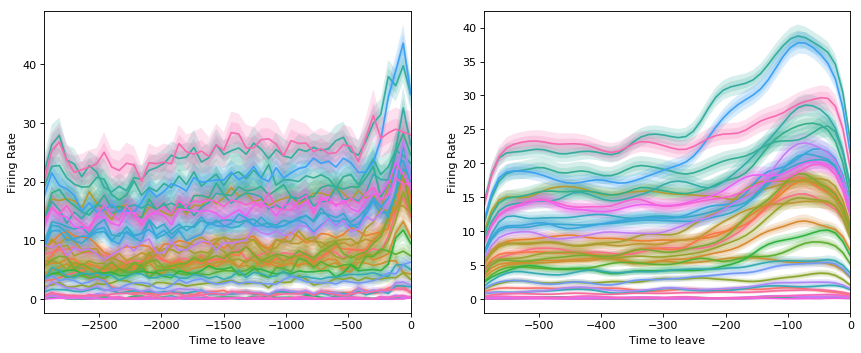

In [31]:
fig = plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
motorPlot(epochs, totalTime=3000,sigma=20)
plt.subplot(1,2,2)
motorPlot(epochs, totalTime=600,sigma=20)

---

In [ ]:
fr = 1
isi = 5



fig = plt.figure(figsize=(6, 9), dpi= 80, facecolor='w', edgecolor='k')
for i in range(4):
    filename = 'Data/r'+str(i+7)+'_filtered_epoch_fr'+str(fr)+'_isi'+str(isi)+'.pickle'
    epochs = pickle.load(open(filename,'rb'))
    trialsOfInterest = epochs.iloc[0].apply(len).values > 1500
    epochs = epochs.iloc[:,trialsOfInterest]
    for j in range(3):
        plt.subplot(4,3,i*3+j+1)
        trialNeuronPlot(epochs,i+2,j+1,xmax=1000)
        plt.plot()

In [ ]:
epochs.apply(axis=1)

epochs = filterEpochs(epochs,minFiringRate=1,minISI=5)

In [ ]:
fig = plt.figure(figsize=(16, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
sns.heatmap(filterEpochs(TOI).applymap(np.sum))
plt.subplot(1,2,2)
sns.heatmap(filterEpochs(epochs).applymap(np.sum))

In [ ]:
test = XyTfromEpoch(TOI,window=[-500,1000])


In [ ]:
test.shape

In [ ]:
normFilter = st.norm(0,100).pdf(np.linspace(-300,300,600))
plt.plot(np.linspace(-300,300,600),normFilter)

In [ ]:
x = TOI.iloc[18,15]

In [ ]:
trialsOfInterest = (behavior.duration>1).as_matrix()
TOI = epochs.iloc[:,trialsOfInterest]
TOI = TOI.apply(lambda x: x.apply(lambda x: convHist) )

In [ ]:
from spikeHelper.filters import kernelSmooth
x = epochs.iloc[18,15]
times = np.nonzero(x)[0]
#sns.distplot(times, kde=False, rug=True, bins=20);
sns.rugplot(times)
plt.plot(kernelSmooth(x))
plt.bar(np.arange(30)*50,convHist(x)/50,width= .8*50,alpha=.3)